In [8]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
kontur = gpd.read_file("D:\CADT\kontur_population_20231101.gpkg\population_clip_cambodia.gpkg", layer='population_clip_cambodia')

In [4]:
kontur.head()

,h3,population,geometry
0,886936db6dfffff,4.0,"MULTIPOLYGON (((107.3491 13.7821, 107.34966 13..."
1,886936db67fffff,9.0,"MULTIPOLYGON (((107.3617 13.77282, 107.36227 1..."
2,886936db65fffff,9.0,"MULTIPOLYGON (((107.35273 13.7739, 107.3533 13..."
3,886936db63fffff,23.0,"MULTIPOLYGON (((107.36703 13.77994, 107.3676 1..."
4,886936db61fffff,9.0,"MULTIPOLYGON (((107.35807 13.78102, 107.35863 ..."


Total population in Cambodia (Kontur): 17,028,918


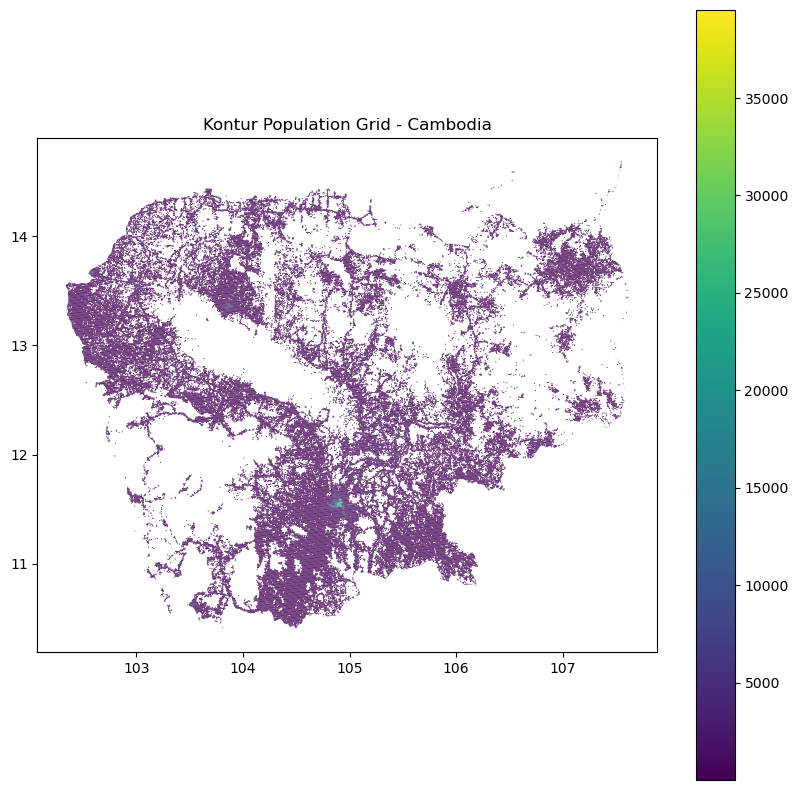

In [9]:
total_population = kontur['population'].sum()
print(f"Total population in Cambodia (Kontur): {total_population:,.0f}")
kontur.plot(column='population', cmap='viridis', legend=True, figsize=(10, 10))
plt.title('Kontur Population Grid - Cambodia')
plt.show()

In [10]:
communes = gpd.read_file(r'D:\CADT\kontur_population_20231101.gpkg\CambodiaCommune_Fixed.gpkg')

In [11]:
phnom_penh_communes = communes[communes['ADM1_EN'].str.lower().str.contains('phnom penh')]

In [ ]:
phnom_penh_communes

In [12]:
# Ensure CRS matches
kontur = kontur.to_crs(phnom_penh_communes.crs)

In [13]:
# Spatial join: keep only population data within Phnom Penh communes
kontur_pp = gpd.sjoin(kontur, phnom_penh_communes, how='inner', predicate='intersects')

In [21]:
kontur_pp.head()

,h3,population,geometry,index_right,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn
38862,886586a6ebfffff,255.0,"MULTIPOLYGON (((104.97555 11.70869, 104.97609 ...",466,0.209855,0.001835,Kaoh Dach,KH121004,None,None,None,Chraoy Chongvar,KH1210,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04
38868,886586a6ddfffff,1337.0,"MULTIPOLYGON (((104.95959 11.68686, 104.96012 ...",466,0.209855,0.001835,Kaoh Dach,KH121004,None,None,None,Chraoy Chongvar,KH1210,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04
38869,886586a6dbfffff,125.0,"MULTIPOLYGON (((104.94522 11.68054, 104.94576 ...",466,0.209855,0.001835,Kaoh Dach,KH121004,None,None,None,Chraoy Chongvar,KH1210,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04
38870,886586a6d9fffff,764.0,"MULTIPOLYGON (((104.95427 11.67958, 104.9548 1...",466,0.209855,0.001835,Kaoh Dach,KH121004,None,None,None,Chraoy Chongvar,KH1210,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04
38871,886586a6d7fffff,323.0,"MULTIPOLYGON (((104.94682 11.69604, 104.94735 ...",466,0.209855,0.001835,Kaoh Dach,KH121004,None,None,None,Chraoy Chongvar,KH1210,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04


In [27]:
pp_population = kontur_pp.drop_duplicates(subset='h3', keep='first')

In [28]:
total_population = pp_population['population'].sum()
total_h3 = pp_population['h3'].count()

print(f"Total population in Phnom Penh (Kontur): {total_population:,.0f}")
print(f"Total population in Phnom Penh (Kontur): {total_h3}")

Total population in Phnom Penh (Kontur): 2,395,307
Total population in Phnom Penh (Kontur): 866


In [44]:
import folium

# Get the centroid of Phnom Penh for map center
center = phnom_penh_communes.geometry.unary_union.centroid
m = folium.Map(location=[center.y, center.x], zoom_start=12)

# Add hexagons
for _, row in kontur_pp.iterrows():
    geo_json = folium.GeoJson(row['geometry'], 
                              style_function=lambda x: {'fillColor': 'blue', 'color': 'blue', 'weight': 1, 'fillOpacity': 0.2})
    geo_json.add_to(m)

# Add boundary
folium.GeoJson(phnom_penh_communes.geometry.unary_union, 
               style_function=lambda x: {'color': 'red', 'weight': 2, 'fillOpacity': 0}).add_to(m)

m

C:\Users\User\AppData\Local\Temp\ipykernel_6664\2099173739.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = phnom_penh_communes.geometry.unary_union.centroid
C:\Users\User\AppData\Local\Temp\ipykernel_6664\2099173739.py:14: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  folium.GeoJson(phnom_penh_communes.geometry.unary_union,


In [30]:
total_population = kontur_pp['population'].sum()
total_h3 = kontur_pp['h3'].count()

print(f"Total population in Phnom Penh (Kontur): {total_population:,.0f}")
print(f"Total population in Phnom Penh (Kontur): {total_h3}")

Total population in Phnom Penh (Kontur): 6,298,690
Total population in Phnom Penh (Kontur): 1470


In [ ]:
grouping_columns = ['ADM1_EN', 'ADM2_EN', 'ADM3_EN', 'h3']  # Replace with actual column names

grouped_stats = kontur_pp[grouping_columns]

In [37]:
grouped_stats

,ADM1_EN,ADM2_EN,ADM3_EN,h3
38862,Phnom Penh,Chraoy Chongvar,Kaoh Dach,886586a6ebfffff
38868,Phnom Penh,Chraoy Chongvar,Kaoh Dach,886586a6ddfffff
38869,Phnom Penh,Chraoy Chongvar,Kaoh Dach,886586a6dbfffff
38870,Phnom Penh,Chraoy Chongvar,Kaoh Dach,886586a6d9fffff
38871,Phnom Penh,Chraoy Chongvar,Kaoh Dach,886586a6d7fffff
...,...,...,...,...
71625,Phnom Penh,Praek Pnov,Samraong,886580d047fffff
71627,Phnom Penh,Praek Pnov,Samraong,886580d043fffff
71628,Phnom Penh,Praek Pnov,Samraong,886580d041fffff
71640,Phnom Penh,Praek Pnov,Samraong,886580d00bfffff


In [ ]:
# import json

# nested = {}
# for _, row in grouped_stats.iterrows():
#     adm1 = row['ADM1_EN']
#     adm2 = row['ADM2_EN']
#     adm3 = row['ADM3_EN']
#     h3 = row['h3']
#     # Build nested dict
#     nested.setdefault(adm1, {}).setdefault(adm2, {}).setdefault(adm3, {})[h3] = {}

# # Save to JSON
# with open('hexagon_mapping.json', 'w', encoding='utf-8') as f:
#     json.dump(nested, f, indent=2, ensure_ascii=False)